<div class="alert alert-block alert-info">

## Tasca M8 T01 Anàlisi de sentiment i textos.
### Objectius

- Realitzar mineria de texts.
- Interpretació dels textos.
- Anàlisis dels resultats.

    
    
- **Exercici 1**

    - Agafa un text en anglès que vulguis, i calcula'n la freqüència de les paraules.

- **Exercici 2**

    - Treu les stopwords i realitza stemming al teu conjunt de dades..


- **Exercici 3**

    - Realitza sentiment analysis al teu conjunt de dades.
</div>

In [1]:
# importing the necessary modules:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from PIL import Image
import seaborn as sns

In [22]:
#Loading NLTK
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

nltk.download('punkt')

nltk.download("stopwords")
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('wordnet')
nltk.download('omw-1.4')

from collections import Counter
from nltk.probability import FreqDist

from nltk.stem.wordnet import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\crist\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\crist\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# import the pattern package sentiment analysis:
from pattern.en import sentiment

from nltk.sentiment import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')


<div class="alert alert-block alert-info">
    
## Exercici 1
    
    
- Agafa un text en anglès que vulguis, i calcula'n la freqüència de les paraules.
</div>

<div class="alert alert-warning alert-warning"> 

- Per tal de fer l'exercici em baixo el llibre de Sheackpeare de Mid Summer night en anglès
  
- Primer llegiré el text, treientli el caracters de salt de linia i substituint-lo per espais i el col·loco a una variable tipus string.
  

</div>

In [173]:
## Reading the Mid summer night dream of Sheakspeare

# midsummer = open('Midsummernight_Sheakspeare.txt', 'r').read()
# midsummer

with open('Midsummernight_Sheakspeare.txt', 'r') as file:
    midsummer = file.read().replace('\n', '')
midsummer

'UNITED STATES OF AMERICA. 2 ^^\'\' gfte Sttt^cttts\' SjeKiics of gttglisTt Â©lassies. SHAKESPEARE\'S COMEDY OF A Midsummer-Nights Dream EDITED WITH INTRODUCTION AND NOTES BY KATHARINE LEE BATES Wellesley College * " Music and poesy use to quickest you " Taming of the Shrew, I. i. NOV ^^^^ LEACH, SHEWELL, & SANBORN, BOSTON. NEW YORK. CHICAGO. N. ^v. V Copyright, 1895, By Leach, Shewell, & Sanbokn. /^-5fJT> Typogkapht by C. J. Petees & Son, Boston Pbesswobk by Bebwick & Smith. PREFACE. This school edition of A Midsumtner-Night^ s Dream differs but little in plan from the preceding edition of The Merchant of Venice. Both books aim to recog- nize the poetic values of Shakesperian study, and to stimulate the student to do his own thinking about the plays. The distinctive feature of the editing is to be found in the interrogative character of the notes. In- formation which the student could not readily obtain for himself and brief quotations of peculiarly suggestive criticism are supplied, 

<div class="alert alert-warning alert-warning"> 

- Per tal de fer el recompte de paraules, tockenitzo el text, i obting l text en un llistat de paraules
  
- Després li calculo la frequencia amb una funció especifica del paquet nltk
    
- imostro els primers 15 resultats
    
- També plotejo els resultats.
  

</div>

In [174]:
#We get a list of strings that NLTK considers to be words
## But the following strings were also considered to be words: "'s" ',''.'
tokenized_word=word_tokenize(midsummer)
tokenized_word

['UNITED',
 'STATES',
 'OF',
 'AMERICA',
 '.',
 '2',
 '^^',
 "''",
 'gfte',
 'Sttt^cttts',
 "'",
 'SjeKiics',
 'of',
 'gttglisTt',
 'Â©lassies',
 '.',
 'SHAKESPEARE',
 "'S",
 'COMEDY',
 'OF',
 'A',
 'Midsummer-Nights',
 'Dream',
 'EDITED',
 'WITH',
 'INTRODUCTION',
 'AND',
 'NOTES',
 'BY',
 'KATHARINE',
 'LEE',
 'BATES',
 'Wellesley',
 'College',
 '*',
 '``',
 'Music',
 'and',
 'poesy',
 'use',
 'to',
 'quickest',
 'you',
 '``',
 'Taming',
 'of',
 'the',
 'Shrew',
 ',',
 'I.',
 'i.',
 'NOV',
 '^^^^',
 'LEACH',
 ',',
 'SHEWELL',
 ',',
 '&',
 'SANBORN',
 ',',
 'BOSTON',
 '.',
 'NEW',
 'YORK',
 '.',
 'CHICAGO',
 '.',
 'N.',
 '^v',
 '.',
 'V',
 'Copyright',
 ',',
 '1895',
 ',',
 'By',
 'Leach',
 ',',
 'Shewell',
 ',',
 '&',
 'Sanbokn',
 '.',
 '/^-5fJT',
 '>',
 'Typogkapht',
 'by',
 'C.',
 'J.',
 'Petees',
 '&',
 'Son',
 ',',
 'Boston',
 'Pbesswobk',
 'by',
 'Bebwick',
 '&',
 'Smith',
 '.',
 'PREFACE',
 '.',
 'This',
 'school',
 'edition',
 'of',
 'A',
 'Midsumtner-Night^',
 's',
 'Dream',


In [175]:
## We get the frequency of each word
fdist = FreqDist(tokenized_word)

In [176]:
## and the most 15 frequen words
fdist.most_common(15)


[('.', 4873),
 (',', 4674),
 ('the', 2709),
 ('of', 1655),
 ('and', 1233),
 ('to', 896),
 ('in', 883),
 ('?', 871),
 ('a', 807),
 ('is', 793),
 ('``', 747),
 ('I', 663),
 (';', 630),
 ('â€', 581),
 ('”', 581)]

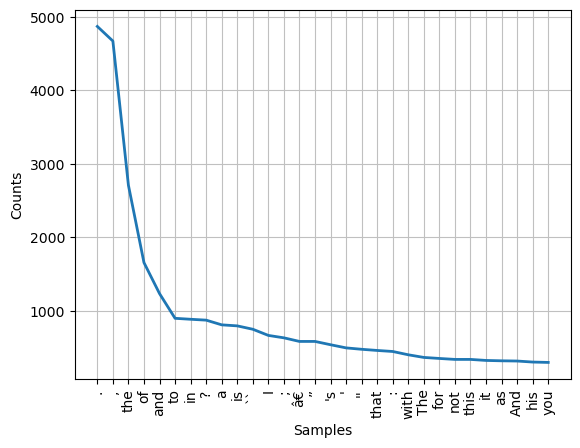

In [177]:
fdist.plot(30,cumulative=False)
plt.show()



<div class="alert alert-warning alert-warning"> 

- Primer de tot observem què en el llistat de paraules estan inclosos alguns signes de puntuació, que de fet, el . és el més frequent, per tant aquest llistat és poc representatiu, el que ens porta a l'exercici 2
  
- Per tal de fer el llistat representatiu farem dues coses:
    - Primer ens baixarem stopwords en angles i les filtrarem del nostre llistat
    - i segon, també filtrarem del nostre text tots els signes i simbols que trobem
    

  

</div>


<div class="alert alert-block alert-info">
    
## Exercici 2
    
    
- Treu les stopwords i realitza stemming al teu conjunt de dades..
</div>


In [178]:
## Obtain english stopwords
stop_words = set(stopwords.words("english"))

## Display length of list
len(stop_words)

## Display list
stop_words


{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

<div class="alert alert-warning alert-warning"> 

- veiem el tipus de paraules que filtrarà
  
- Creem un bucle per tal de filtrar la nostra llista amb aquestes paraules
    

  

</div>


In [179]:
filtered_sent=[]
for w in tokenized_word:
    if w not in stop_words:
        filtered_sent.append(w)
print("Tokenized Sentence:",tokenized_word)
print("Filterd Sentence:",filtered_sent)


Tokenized Sentence: ['UNITED', 'STATES', 'OF', 'AMERICA', '.', '2', '^^', "''", 'gfte', 'Sttt^cttts', "'", 'SjeKiics', 'of', 'gttglisTt', 'Â©lassies', '.', 'SHAKESPEARE', "'S", 'COMEDY', 'OF', 'A', 'Midsummer-Nights', 'Dream', 'EDITED', 'WITH', 'INTRODUCTION', 'AND', 'NOTES', 'BY', 'KATHARINE', 'LEE', 'BATES', 'Wellesley', 'College', '*', '``', 'Music', 'and', 'poesy', 'use', 'to', 'quickest', 'you', '``', 'Taming', 'of', 'the', 'Shrew', ',', 'I.', 'i.', 'NOV', '^^^^', 'LEACH', ',', 'SHEWELL', ',', '&', 'SANBORN', ',', 'BOSTON', '.', 'NEW', 'YORK', '.', 'CHICAGO', '.', 'N.', '^v', '.', 'V', 'Copyright', ',', '1895', ',', 'By', 'Leach', ',', 'Shewell', ',', '&', 'Sanbokn', '.', '/^-5fJT', '>', 'Typogkapht', 'by', 'C.', 'J.', 'Petees', '&', 'Son', ',', 'Boston', 'Pbesswobk', 'by', 'Bebwick', '&', 'Smith', '.', 'PREFACE', '.', 'This', 'school', 'edition', 'of', 'A', 'Midsumtner-Night^', 's', 'Dream', 'differs', 'but', 'little', 'in', 'plan', 'from', 'the', 'preceding', 'edition', 'of', 'T

<div class="alert alert-warning alert-warning"> 

- Tornem a fer una frequencia de paraules
  
- i la tornem a plotejar
    

  

</div>

In [180]:
fdist_token = FreqDist(filtered_sent)

In [181]:
fdist_token.most_common(15)

[('.', 4873),
 (',', 4674),
 ('?', 871),
 ('``', 747),
 ('I', 663),
 (';', 630),
 ('â€', 581),
 ('”', 581),
 ("'s", 536),
 ("'", 493),
 ("''", 474),
 (':', 444),
 ('The', 363),
 ('And', 314),
 ('!', 262)]

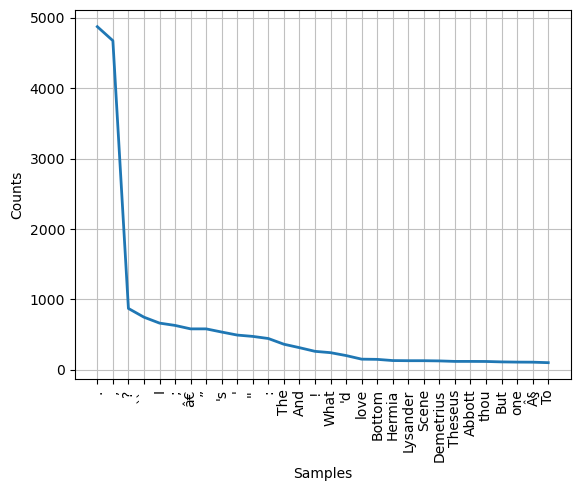

In [182]:
fdist_token.plot(30,cumulative=False)

plt.show()

<div class="alert alert-warning alert-warning"> 

- Tant en el llistat com en el gràfic veiem que ara ja hi ha una serie de paraules que ja no hi són, però seguim tenint molts signes de puntuació i simbols varis
  
- Procedim a filtrar-los
    
- Els filtrem del text original i tornem a tokenitzar-lo
    

  

</div>

In [195]:
## RTemoving punctuation
All_punct = '''!()-[]{};:'"\,<>./?@#$%^&*_~”â€Â©¢«§'''

for elements in midsummer:
    if elements in All_punct:
        midsummer = midsummer.replace(elements, "")
midsummer

'UNITED STATES OF AMERICA 2  gfte Stttcttts SjeKiics of gttglisTt lassies SHAKESPEARES COMEDY OF A MidsummerNights Dream EDITED WITH INTRODUCTION AND NOTES BY KATHARINE LEE BATES Wellesley College   Music and poesy use to quickest you  Taming of the Shrew I i NOV  LEACH SHEWELL  SANBORN BOSTON NEW YORK CHICAGO N v V Copyright 1895 By Leach Shewell  Sanbokn 5fJT Typogkapht by C J Petees  Son Boston Pbesswobk by Bebwick  Smith PREFACE This school edition of A MidsumtnerNight s Dream differs but little in plan from the preceding edition of The Merchant of Venice Both books aim to recog nize the poetic values of Shakesperian study and to stimulate the student to do his own thinking about the plays The distinctive feature of the editing is to be found in the interrogative character of the notes In formation which the student could not readily obtain for himself and brief quotations of peculiarly suggestive criticism are supplied but more often questions take the space usually allotted to st

In [196]:
tokenized_word=word_tokenize(midsummer)
tokenized_word

['UNITED',
 'STATES',
 'OF',
 'AMERICA',
 '2',
 'gfte',
 'Stttcttts',
 'SjeKiics',
 'of',
 'gttglisTt',
 'lassies',
 'SHAKESPEARES',
 'COMEDY',
 'OF',
 'A',
 'MidsummerNights',
 'Dream',
 'EDITED',
 'WITH',
 'INTRODUCTION',
 'AND',
 'NOTES',
 'BY',
 'KATHARINE',
 'LEE',
 'BATES',
 'Wellesley',
 'College',
 'Music',
 'and',
 'poesy',
 'use',
 'to',
 'quickest',
 'you',
 'Taming',
 'of',
 'the',
 'Shrew',
 'I',
 'i',
 'NOV',
 'LEACH',
 'SHEWELL',
 'SANBORN',
 'BOSTON',
 'NEW',
 'YORK',
 'CHICAGO',
 'N',
 'v',
 'V',
 'Copyright',
 '1895',
 'By',
 'Leach',
 'Shewell',
 'Sanbokn',
 '5fJT',
 'Typogkapht',
 'by',
 'C',
 'J',
 'Petees',
 'Son',
 'Boston',
 'Pbesswobk',
 'by',
 'Bebwick',
 'Smith',
 'PREFACE',
 'This',
 'school',
 'edition',
 'of',
 'A',
 'MidsumtnerNight',
 's',
 'Dream',
 'differs',
 'but',
 'little',
 'in',
 'plan',
 'from',
 'the',
 'preceding',
 'edition',
 'of',
 'The',
 'Merchant',
 'of',
 'Venice',
 'Both',
 'books',
 'aim',
 'to',
 'recog',
 'nize',
 'the',
 'poetic',


In [197]:
fdist = FreqDist(tokenized_word)
fdist.most_common(30)

[('the', 2711),
 ('of', 1656),
 ('and', 1233),
 ('in', 898),
 ('to', 897),
 ('a', 807),
 ('is', 784),
 ('I', 707),
 ('that', 456),
 ('with', 400),
 ('The', 364),
 ('for', 351),
 ('this', 337),
 ('not', 336),
 ('it', 320),
 ('as', 318),
 ('And', 314),
 ('his', 300),
 ('you', 294),
 ('be', 254),
 ('What', 241),
 ('by', 231),
 ('my', 230),
 ('have', 220),
 ('me', 219),
 ('he', 217),
 ('or', 201),
 ('so', 194),
 ('her', 189),
 ('from', 183)]

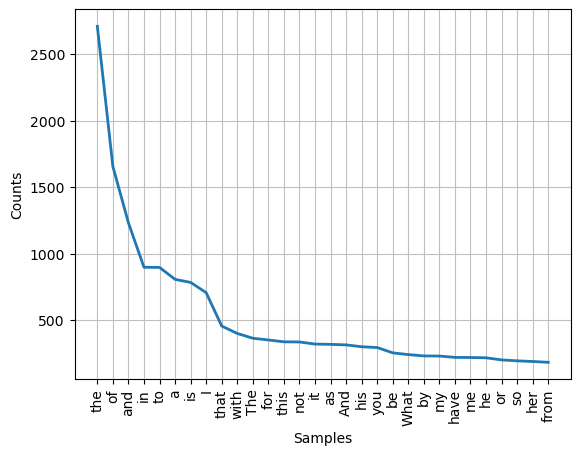

In [198]:
fdist.plot(30,cumulative=False)
plt.show()

In [199]:
stop_words = set(stopwords.words("english"))

filtered_sent=[]
for w in tokenized_word:
    if w not in stop_words:
        filtered_sent.append(w)
print("Tokenized Sentence:",tokenized_word)
print("Filterd Sentence:",filtered_sent)

Tokenized Sentence: ['UNITED', 'STATES', 'OF', 'AMERICA', '2', 'gfte', 'Stttcttts', 'SjeKiics', 'of', 'gttglisTt', 'lassies', 'SHAKESPEARES', 'COMEDY', 'OF', 'A', 'MidsummerNights', 'Dream', 'EDITED', 'WITH', 'INTRODUCTION', 'AND', 'NOTES', 'BY', 'KATHARINE', 'LEE', 'BATES', 'Wellesley', 'College', 'Music', 'and', 'poesy', 'use', 'to', 'quickest', 'you', 'Taming', 'of', 'the', 'Shrew', 'I', 'i', 'NOV', 'LEACH', 'SHEWELL', 'SANBORN', 'BOSTON', 'NEW', 'YORK', 'CHICAGO', 'N', 'v', 'V', 'Copyright', '1895', 'By', 'Leach', 'Shewell', 'Sanbokn', '5fJT', 'Typogkapht', 'by', 'C', 'J', 'Petees', 'Son', 'Boston', 'Pbesswobk', 'by', 'Bebwick', 'Smith', 'PREFACE', 'This', 'school', 'edition', 'of', 'A', 'MidsumtnerNight', 's', 'Dream', 'differs', 'but', 'little', 'in', 'plan', 'from', 'the', 'preceding', 'edition', 'of', 'The', 'Merchant', 'of', 'Venice', 'Both', 'books', 'aim', 'to', 'recog', 'nize', 'the', 'poetic', 'values', 'of', 'Shakesperian', 'study', 'and', 'to', 'stimulate', 'the', 'stude

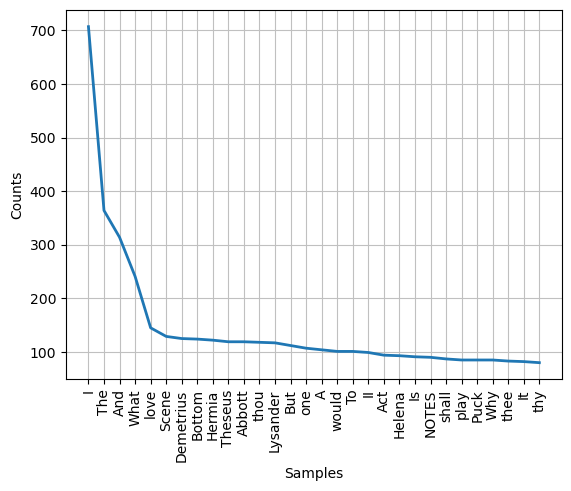

In [200]:
fdist_token = FreqDist(filtered_sent)
fdist_token.plot(30,cumulative=False)

plt.show()

In [201]:
fdist_token.most_common(20)


[('I', 707),
 ('The', 364),
 ('And', 314),
 ('What', 241),
 ('love', 145),
 ('Scene', 129),
 ('Demetrius', 125),
 ('Bottom', 124),
 ('Hermia', 122),
 ('Theseus', 119),
 ('Abbott', 119),
 ('thou', 118),
 ('Lysander', 117),
 ('But', 112),
 ('one', 107),
 ('A', 104),
 ('would', 101),
 ('To', 101),
 ('II', 99),
 ('Act', 94)]

<div class="alert alert-warning alert-warning"> 

- Desprès de fer el filtrat de stopwords i de simbols, trobem les paraules més frequents. 
  
- Veiem que la primera paraula és I, jo, és una obra de teatre en anglès, així que té força sentit, la segueixen the i and
    
- Més interessant serien ja les paraules Love, veime que parlenmolt doncs d'amor, deprès com apareixen o de quins personatges es parla més
    
- Desprès veiem que hi ha forces altres paraules, que probablament en aquest analisis no aporten molt, com but o A o one, que requeririen de més filtratge.

- Tot i així, si es fes un analisis de sentiment més exhaustiu, podrien aportar informacií i s'haurien de deixar
    
- Seguim amb una lemmanització i un stemming de les paraules:
  

</div>

In [202]:
#Lexicon Normalization
#performing Lemmatization
lemmatizer = WordNetLemmatizer()

lemmatized_list = [lemmatizer.lemmatize(word) for word in filtered_sent]

print(lemmatized_list)


['UNITED', 'STATES', 'OF', 'AMERICA', '2', 'gfte', 'Stttcttts', 'SjeKiics', 'gttglisTt', 'lassie', 'SHAKESPEARES', 'COMEDY', 'OF', 'A', 'MidsummerNights', 'Dream', 'EDITED', 'WITH', 'INTRODUCTION', 'AND', 'NOTES', 'BY', 'KATHARINE', 'LEE', 'BATES', 'Wellesley', 'College', 'Music', 'poesy', 'use', 'quickest', 'Taming', 'Shrew', 'I', 'NOV', 'LEACH', 'SHEWELL', 'SANBORN', 'BOSTON', 'NEW', 'YORK', 'CHICAGO', 'N', 'v', 'V', 'Copyright', '1895', 'By', 'Leach', 'Shewell', 'Sanbokn', '5fJT', 'Typogkapht', 'C', 'J', 'Petees', 'Son', 'Boston', 'Pbesswobk', 'Bebwick', 'Smith', 'PREFACE', 'This', 'school', 'edition', 'A', 'MidsumtnerNight', 'Dream', 'differs', 'little', 'plan', 'preceding', 'edition', 'The', 'Merchant', 'Venice', 'Both', 'book', 'aim', 'recog', 'nize', 'poetic', 'value', 'Shakesperian', 'study', 'stimulate', 'student', 'thinking', 'play', 'The', 'distinctive', 'feature', 'editing', 'found', 'interrogative', 'character', 'note', 'In', 'formation', 'student', 'could', 'readily', 'ob

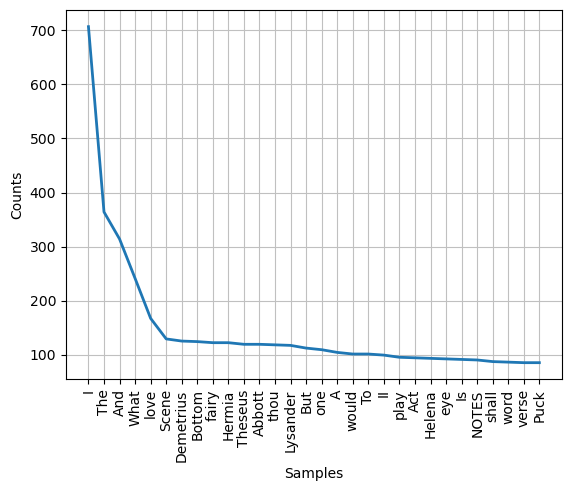

In [203]:
fdist_lemmanized = FreqDist(lemmatized_list)
fdist_lemmanized.plot(30,cumulative=False)

plt.show()

In [204]:
#Lexicon Normalization
#performing stemming 
stemmer = PorterStemmer()


stemmed_list = [stemmer.stem(word) for word in filtered_sent]

print(stemmed_list)

['unit', 'state', 'of', 'america', '2', 'gfte', 'stttcttt', 'sjekiic', 'gttglistt', 'lassi', 'shakespear', 'comedi', 'of', 'a', 'midsummernight', 'dream', 'edit', 'with', 'introduct', 'and', 'note', 'by', 'katharin', 'lee', 'bate', 'wellesley', 'colleg', 'music', 'poesi', 'use', 'quickest', 'tame', 'shrew', 'i', 'nov', 'leach', 'shewel', 'sanborn', 'boston', 'new', 'york', 'chicago', 'n', 'v', 'v', 'copyright', '1895', 'by', 'leach', 'shewel', 'sanbokn', '5fjt', 'typogkapht', 'c', 'j', 'pete', 'son', 'boston', 'pbesswobk', 'bebwick', 'smith', 'prefac', 'thi', 'school', 'edit', 'a', 'midsumtnernight', 'dream', 'differ', 'littl', 'plan', 'preced', 'edit', 'the', 'merchant', 'venic', 'both', 'book', 'aim', 'recog', 'nize', 'poetic', 'valu', 'shakesperian', 'studi', 'stimul', 'student', 'think', 'play', 'the', 'distinct', 'featur', 'edit', 'found', 'interrog', 'charact', 'note', 'in', 'format', 'student', 'could', 'readili', 'obtain', 'brief', 'quotat', 'peculiarli', 'suggest', 'critic', '

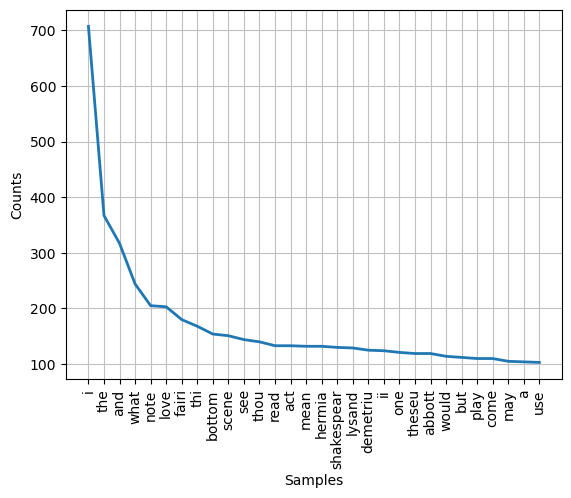

In [205]:
fdist_stemmed = FreqDist(stemmed_list)
fdist_stemmed.plot(30,cumulative=False)

plt.show()

<div class="alert alert-warning alert-warning"> 

- Veiem que amb la lemanintzacio i el stemming,canviem una micala frequencia de les paraules més comunesobtenint arrels de paraules més comunes 
  
- Seguim tenint la primera I, seguida de the and and, però desprès comencem amb coses més interesants com what, love, note, fari, see
    
- A analitzar el perquè de cadascuna d'aquestes frequencies
  

</div>


<div class="alert alert-block alert-info">
    
## Exercici 3
   
    
- Realitza sentiment analysis al teu conjunt de dades.
</div>

<div class="alert alert-warning alert-warning"> 

- Per fer aquest analisis, ho farem de dues maneres, una forma molt bàsica que et dona una polaritat general i una relibility amb el paquet pattern, i posterirorment, ho farem amb el paquet SentimentIntensityAnalyzer més complet, però més omplex d'analitzar també
  

</div>

In [169]:

# perform the analysis:

sentiment(midsummer)

(0.13976977614100503, 0.5065371272644974)

<div class="alert alert-warning alert-warning"> 

- El primer valor és la **polaritat** com de positiva o negativa és unaparaula en una escala de **-1 a 1**

- El seon pràmetre és la **subjectivitat** que ens informa de com de segur està el model del primer resultat (polaritat) i l'escala va de ** 0 a 1**.
    
    
- Veiem que amb un 0.13 de polaritat sembla que en general el text és més positiu que negatiu, tot i que un 0.5 de subjectivitat ens diu que el model nomès esta segur en un50% del seu resultat...
    
- És un text molt llarg per fer l'analisis d'aquesta manera, així que intentem fer l'analisis per paraules:
  

</div>

In [171]:
## Sentiment analysis by words
sentiment_scores = [(word, sentiment(word)) for word in stemmed_list]

print(sentiment_scores)

[('unit', (0.0, 0.0)), ('state', (0.0, 0.0)), ('of', (0.0, 0.0)), ('america', (0.0, 0.0)), ('2', (0.0, 0.0)), ('gfte', (0.0, 0.0)), ('stttcttt', (0.0, 0.0)), ('sjekiic', (0.0, 0.0)), ('gttglistt', (0.0, 0.0)), ('â©lassi', (0.0, 0.0)), ('shakespear', (0.0, 0.0)), ('comedi', (0.0, 0.0)), ('of', (0.0, 0.0)), ('a', (0.0, 0.0)), ('midsummernight', (0.0, 0.0)), ('dream', (0.0, 0.0)), ('edit', (0.0, 0.0)), ('with', (0.0, 0.0)), ('introduct', (0.0, 0.0)), ('and', (0.0, 0.0)), ('note', (0.0, 0.0)), ('by', (0.0, 0.0)), ('katharin', (0.0, 0.0)), ('lee', (0.0, 0.0)), ('bate', (0.0, 0.0)), ('wellesley', (0.0, 0.0)), ('colleg', (0.0, 0.0)), ('music', (0.0, 0.0)), ('poesi', (0.0, 0.0)), ('use', (0.0, 0.0)), ('quickest', (0.0, 0.0)), ('tame', (-0.21666666666666667, 0.21666666666666667)), ('shrew', (0.0, 0.0)), ('i', (0.0, 0.0)), ('nov', (0.0, 0.0)), ('leach', (0.0, 0.0)), ('shewel', (0.0, 0.0)), ('sanborn', (0.0, 0.0)), ('boston', (0.0, 0.0)), ('new', (0.13636363636363635, 0.45454545454545453)), ('yor

<div class="alert alert-warning alert-warning"> 

- Obtenim els valors per cada paraula, i s'hauria d'analitzar un a a una..

- Provem el paquet de SentimentIntensityAnalyzer    

</div>

In [206]:
## SentimentIntensityAnalyzer package

sia = SentimentIntensityAnalyzer()

sentiment_scores = [sia.polarity_scores(word) for word in stemmed_list]

print(sentiment_scores)

[{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}, {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}, {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}, {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}, {'neg': 0.0, 'neu': 0.0, 'pos': 0.0, 'compound': 0.0}, {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}, {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}, {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}, {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}, {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}, {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}, {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}, {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}, {'neg': 0.0, 'neu': 0.0, 'pos': 0.0, 'compound': 0.0}, {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}, {'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': 0.25}, {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}, {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}, {'neg': 

<div class="alert alert-warning alert-warning"> 

- Obtenim els valors per cada paraula, i s'hauria d'analitzar una a una aqui també..



</div>